In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 

In [2]:
df = pd.read_csv("TensorFlow_FILES/DATA/fake_reg.csv")

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


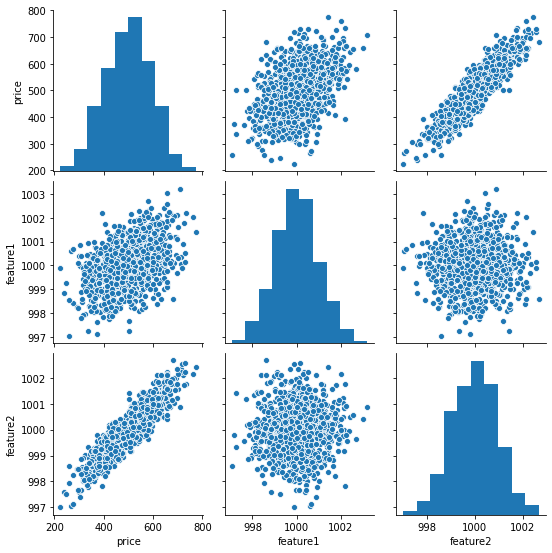

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[["feature1" , "feature2"]].values

In [7]:
y = df["price"].values

In [8]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
X_train.shape

(700, 2)

In [11]:
X_test.shape

(300, 2)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler()

In [15]:
X_train = scaler.transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [18]:
#model = Sequential([Dense(4, activation = 'relu'), 
 #                  Dense(2, activation = 'relu'), 
  #                 Dense(1)])

In [19]:
#convenient way of building out our models
model = Sequential()

model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse')

In [20]:
model.fit(x = X_train, y = y_train, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 571us/step - loss: 256646.9062
Epoch 2/250
22/22 [==============================] - 0s 500us/step - loss: 256512.3594
Epoch 3/250
22/22 [==============================] - 0s 500us/step - loss: 256361.5156
Epoch 4/250
22/22 [==============================] - 0s 548us/step - loss: 256183.5000
Epoch 5/250
22/22 [==============================] - 0s 476us/step - loss: 255973.5469
Epoch 6/250
22/22 [==============================] - 0s 452us/step - loss: 255722.4531
Epoch 7/250
22/22 [==============================] - 0s 524us/step - loss: 255424.6406
Epoch 8/250
22/22 [==============================] - 0s 524us/step - loss: 255077.9844
Epoch 9/250
22/22 [==============================] - 0s 452us/step - loss: 254683.0000
Epoch 10/250
22/22 [==============================] - 0s 500us/step - loss: 254232.3594
Epoch 11/250
22/22 [==============================] - 0s 476us/step - loss: 253726.7500
Epoch 12/250
22/22 [=====================

22/22 [==============================] - 0s 452us/step - loss: 1378.1306
Epoch 95/250
22/22 [==============================] - 0s 477us/step - loss: 1344.4568
Epoch 96/250
22/22 [==============================] - 0s 452us/step - loss: 1319.3036
Epoch 97/250
22/22 [==============================] - 0s 476us/step - loss: 1286.7809
Epoch 98/250
22/22 [==============================] - 0s 738us/step - loss: 1256.7684
Epoch 99/250
22/22 [==============================] - 0s 452us/step - loss: 1230.5736
Epoch 100/250
22/22 [==============================] - 0s 476us/step - loss: 1204.2075
Epoch 101/250
22/22 [==============================] - 0s 500us/step - loss: 1175.6285
Epoch 102/250
22/22 [==============================] - 0s 476us/step - loss: 1147.7030
Epoch 103/250
22/22 [==============================] - 0s 476us/step - loss: 1120.8875
Epoch 104/250
22/22 [==============================] - 0s 548us/step - loss: 1094.1783
Epoch 105/250
22/22 [==============================] - 0s 476u

22/22 [==============================] - 0s 524us/step - loss: 25.2861
Epoch 190/250
22/22 [==============================] - 0s 476us/step - loss: 25.1721
Epoch 191/250
22/22 [==============================] - 0s 476us/step - loss: 25.1841
Epoch 192/250
22/22 [==============================] - 0s 476us/step - loss: 25.0491
Epoch 193/250
22/22 [==============================] - 0s 500us/step - loss: 24.6388
Epoch 194/250
22/22 [==============================] - 0s 476us/step - loss: 24.7199
Epoch 195/250
22/22 [==============================] - 0s 452us/step - loss: 24.5164
Epoch 196/250
22/22 [==============================] - 0s 524us/step - loss: 24.2379
Epoch 197/250
22/22 [==============================] - 0s 476us/step - loss: 24.5777
Epoch 198/250
22/22 [==============================] - 0s 476us/step - loss: 24.3461
Epoch 199/250
22/22 [==============================] - 0s 452us/step - loss: 24.5760
Epoch 200/250
22/22 [==============================] - 0s 476us/step - loss: 24

In [21]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

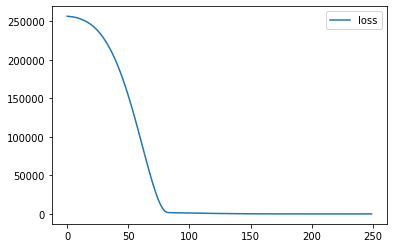

In [22]:
loss_df.plot()

In [23]:
model.evaluate(X_test, y_test,verbose = 0)

25.001678466796875

In [24]:
model.evaluate(X_train, y_train,verbose = 0)

24.18336296081543

In [26]:
test_predictions = model.predict(X_test)

In [30]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [32]:
pred_df = pd.DataFrame(y_test, columns = ['Test True Y'])

In [33]:
pred_df = pd.concat([pred_df, test_predictions], axis = 1)

In [34]:
pred_df.columns = ['Test True Y', 'Model Predictions']

<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

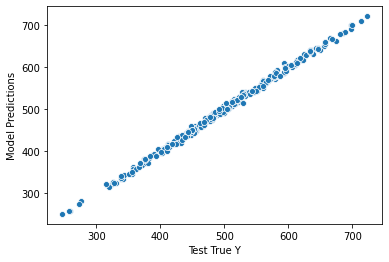

In [35]:
sns.scatterplot(x = 'Test True Y', y = 'Model Predictions', data = pred_df)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.001655996703213

How to tell if this MAE is good? Look at the mean from our summary statistics:

In [39]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


Our MAE only accounts for 1% of our mean, so quite good. 

In [41]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

25.00168420710973

Suppose we pick up a new item. What does our model predict our newly discovered item to be priced at?

In [42]:
new_item = [[998,1000]]

In [44]:
new_item = scaler.transform(new_item)

In [48]:
model.predict(new_item)[0][0]

419.36105

In [49]:
from tensorflow.keras.models import load_model

In [50]:
model.save('my_pricing_model.h5')